In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread

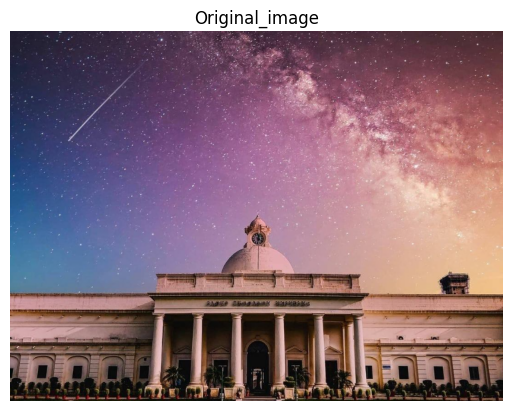

In [2]:
#Loading the sample image
image = imread('sample_img.png')

plt.imshow(image)
plt.title("Original_image")
plt.axis('off')
plt.show()

In [3]:
#Preprocessing the image
Original_shape = image.shape

pixels = image.reshape(-1,3) #reshaping the image into a 2D array of pixels

pixels = pixels / 255.0

In [4]:
#Applying the K-Mean Clustering
k = 7

kmeans = KMeans(n_clusters = k, random_state = 47)
kmeans.fit(pixels)

dominant_colors = kmeans.cluster_centers_
labels = kmeans.labels_

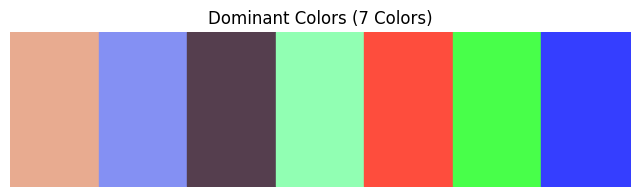

In [5]:
# Plotting the Dominant colours
plt.figure(figsize=(8, 2))

unique, counts = np.unique(labels, return_counts=True)
sorted_indices = np.argsort(-counts)  # Sort by frequency
dominant_colors_sorted = dominant_colors[sorted_indices]

for i, color in enumerate(dominant_colors_sorted):
    plt.fill_betweenx([0, 1], i, i + 1, color=color)

plt.title(f"Dominant Colors ({k} Colors)")
plt.xlim(0, len(dominant_colors_sorted))
plt.ylim(0, 1)
plt.axis('off')
plt.show()


In [6]:
#Reconstructing the compressed image
compressed_pixels = dominant_colors[labels]
compressed_pixels = (compressed_pixels * 255).astype('uint8')

compressed_image = compressed_pixels.reshape(Original_shape)

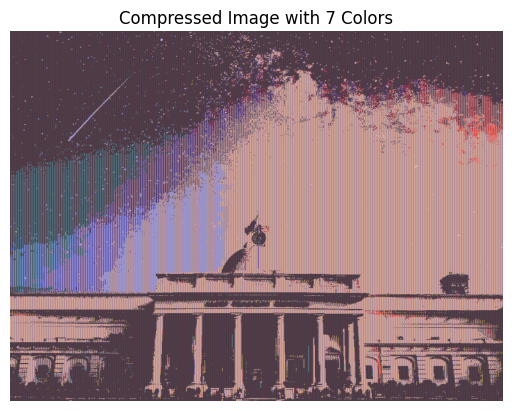

In [7]:
plt.imshow(compressed_image)
plt.title(f"Compressed Image with {k} Colors")
plt.axis('off')
plt.show()

Original Image Size: 16.57 MB
Compressed Image Size: 1.94 MB
Compression Ratio: 8.55


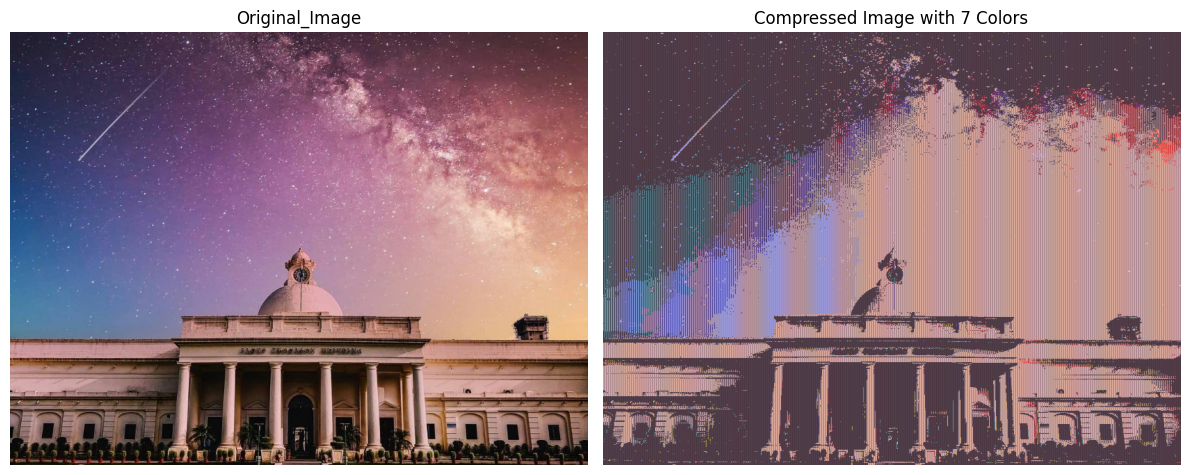

In [8]:
#Evaluating Compression
Original_shape = pixels.size * 8
compressed_size = (k * 3 * 8) + (pixels.shape[0] * np.log2(k))

print(f"Original Image Size: {Original_shape / 1e6:.2f} MB")
print(f"Compressed Image Size: {compressed_size / 1e6:.2f} MB")
print(f"Compression Ratio: {Original_shape / compressed_size:.2f}")

# Displaying original and compressed images side by side
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original_Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Compressed Image with {k} Colors")
plt.axis('off')

plt.tight_layout()
plt.show()